# <a name="0"> Clustering for Marketing Strategy </a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = '/kaggle/input/ccdata/CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Checking duplicate

In [7]:
#copy for the original dataset
df_copy_0=df.copy()

# dropping the CUST_ID to check duplicate
df_copy_0.drop(['CUST_ID'], axis=1)
df_copy_0.duplicated().sum()

0

In [8]:
#checking unique values in each column
for column in df.columns:
    print(f'{column}: {df[column].nunique()}',"\n")

CUST_ID: 8950 

BALANCE: 8871 

BALANCE_FREQUENCY: 43 

PURCHASES: 6203 

ONEOFF_PURCHASES: 4014 

INSTALLMENTS_PURCHASES: 4452 

CASH_ADVANCE: 4323 

PURCHASES_FREQUENCY: 47 

ONEOFF_PURCHASES_FREQUENCY: 47 

PURCHASES_INSTALLMENTS_FREQUENCY: 47 

CASH_ADVANCE_FREQUENCY: 54 

CASH_ADVANCE_TRX: 65 

PURCHASES_TRX: 173 

CREDIT_LIMIT: 205 

PAYMENTS: 8711 

MINIMUM_PAYMENTS: 8636 

PRC_FULL_PAYMENT: 47 

TENURE: 7 



In [9]:
# selecting the columns of interest and dropping nans

columns_of_interest = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'] 

data_of_interest = df[columns_of_interest].dropna()

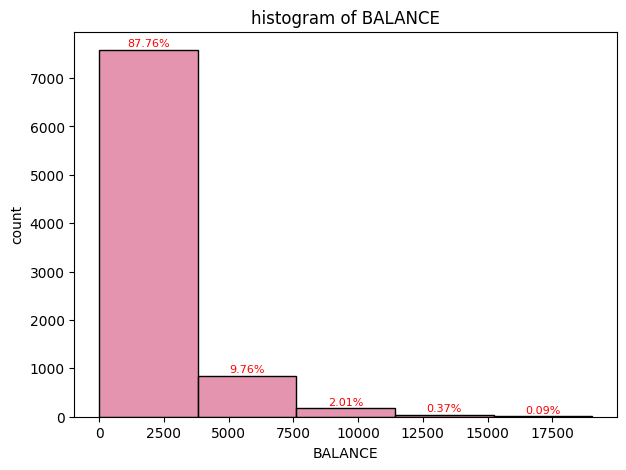

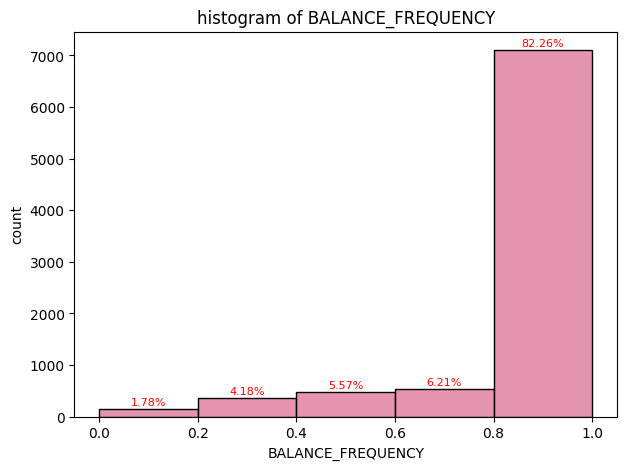

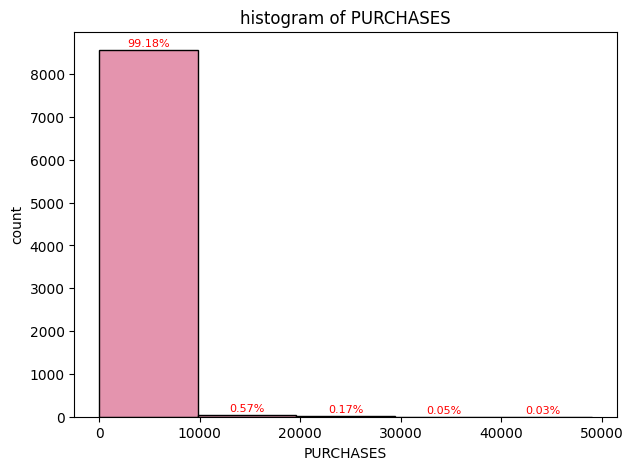

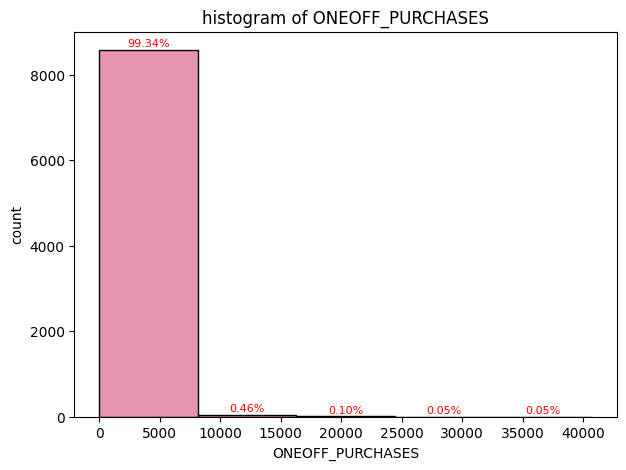

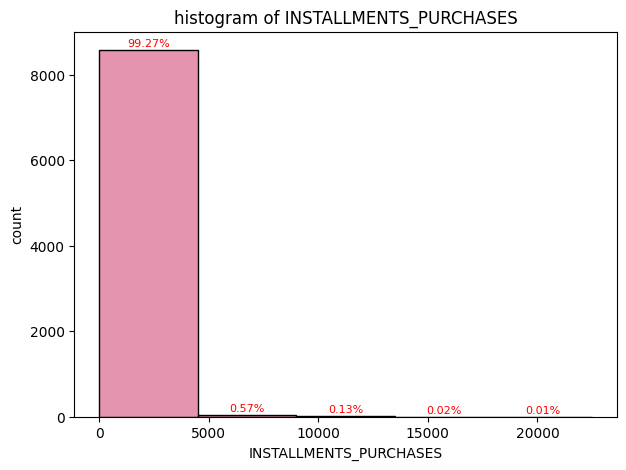

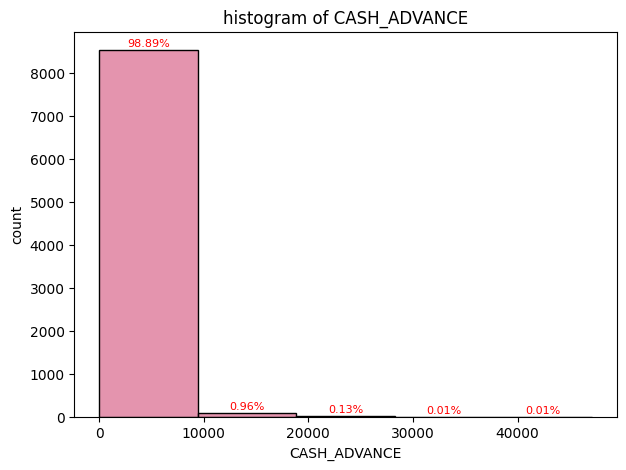

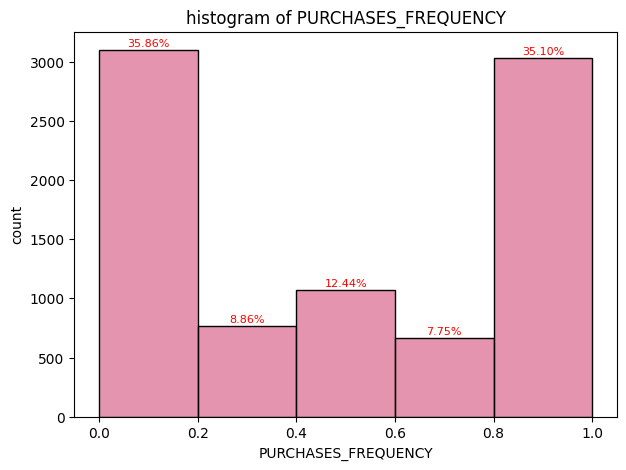

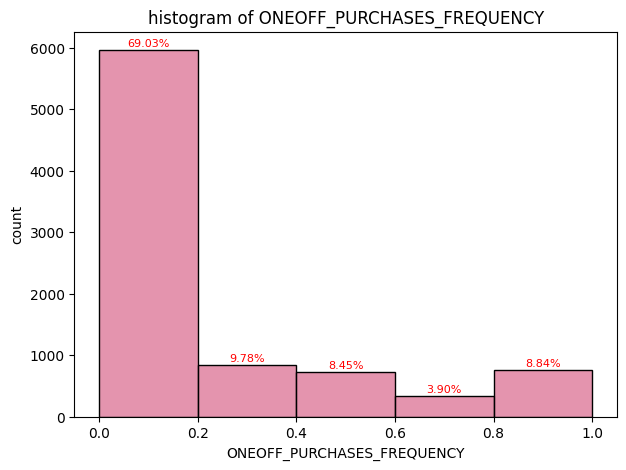

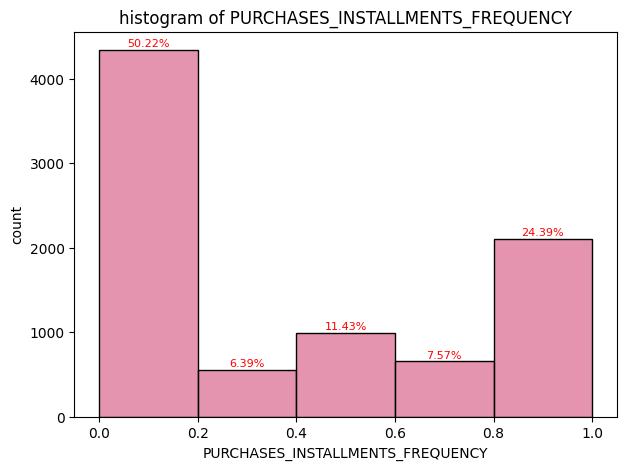

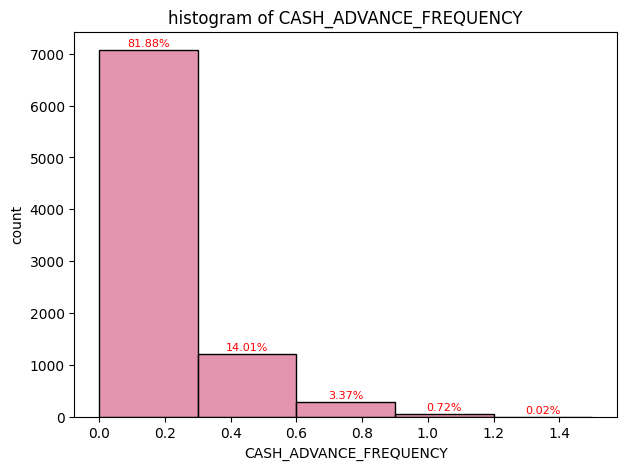

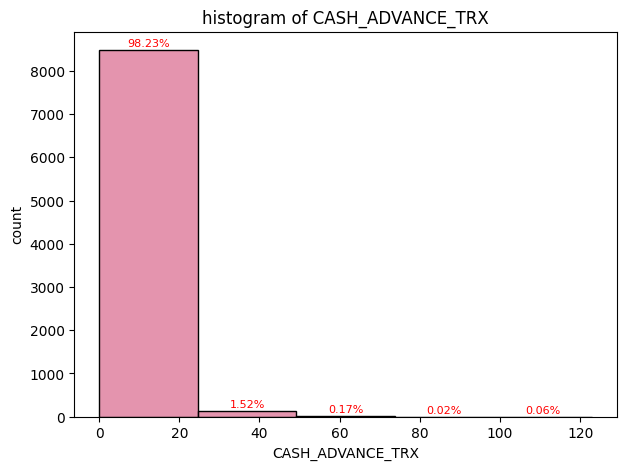

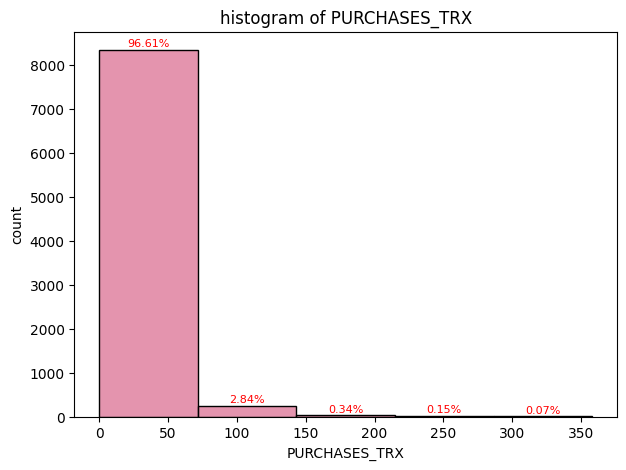

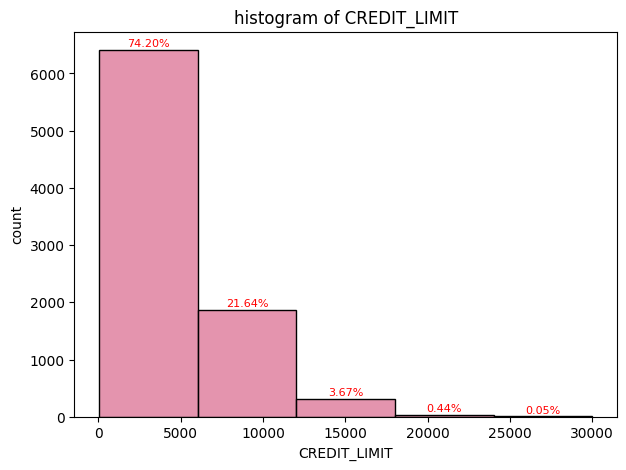

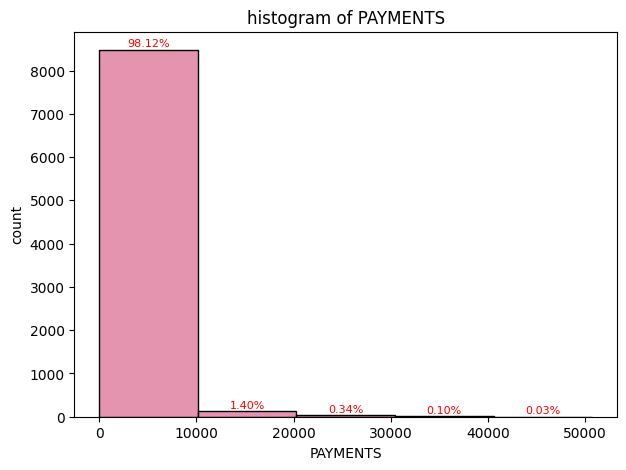

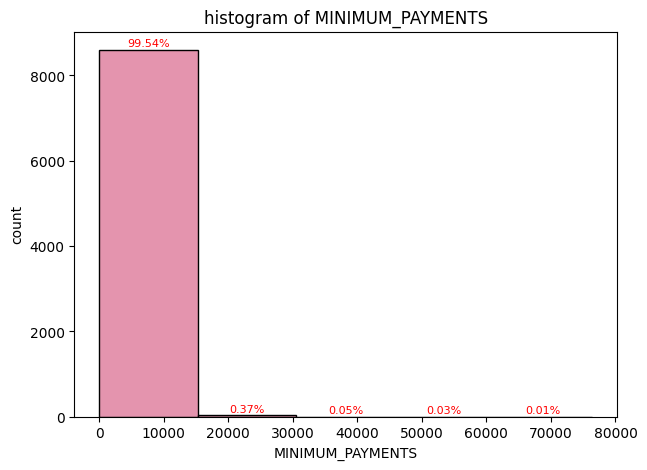

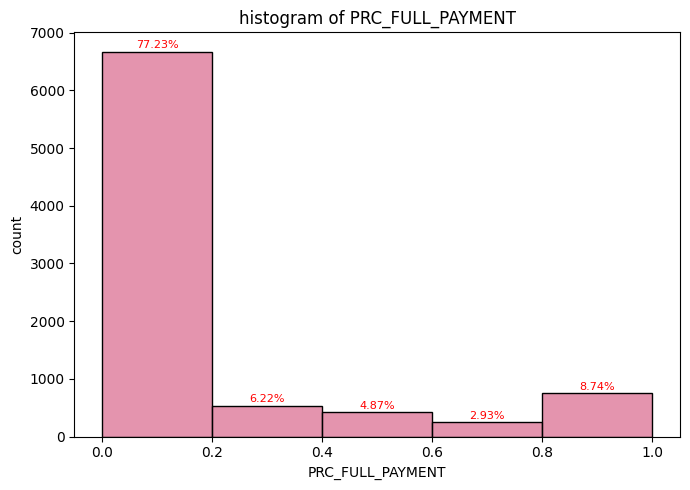

In [10]:
# Ploting histograms for each of columns we are interested in

for column in columns_of_interest:
    plt.figure(figsize=(7, 5))
    sns.histplot(data_of_interest[column], bins=5, kde=False, color='#DB7093', edgecolor='black')
    plt.xlabel(f'{column}')
    plt.ylabel('count')
    plt.title(f'histogram of {column}')
    
    num_bins = 5    
    hist, bins = np.histogram(data_of_interest[column], bins=num_bins)
    percentages = (hist / len(data_of_interest[column])) * 100



    for count, binEdge, percentage in zip(hist,bins[:-1], percentages):
        plt.annotate(f'{percentage:.2f}%', xy=(binEdge + np.diff(bins)[0] / 2, count), xytext=(0, 1),
                     textcoords='offset points', ha='center', va='bottom', fontsize=8, color='red')

plt.tight_layout()
plt.show()


# Insights from Customer Features

## Account Balances:
- Approximately **87.76% of customers** maintain account balances not exceeding \$3750, indicating a trend towards conservative spending habits and financial prudence.

## Balance Update Frequency:
- The majority of customers have their account balances updated frequently, reflecting a proactive approach to monitoring financial status and staying informed about credit card activity.

## Purchase Behavior:
- Nearly **99% of customers** make purchases, with the highest single purchase being under \$10,000, suggesting a preference for moderate spending habits.
- The majority of customers (99%) prefer purchases made in installments, with most opting for purchases under \$5000, indicating a preference for budget-friendly spending and manageable repayment plans.

## Purchase Frequency:
- Approximately **35% of customers** make purchases frequently, while an equal percentage make purchases infrequently, demonstrating varied spending habits among customers.

## One-Go Purchases:
- The majority of customers (78%) do not prefer to make frequent one-go purchases, suggesting a preference for smaller, more frequent transactions.

## Installment Purchases:
- Approximately **56% of customers** do not frequently make purchases with installments, while 24% prefer frequent installment purchases, reflecting a diverse range of preferences regarding payment methods.

## Cash Advance Usage:
- While **95% of customers** do not prefer frequent cash advances, nearly all customers have made cash advance transactions ranging from 0 to 50, suggesting occasional use or emergency financial needs.

## Purchase Transactions:
- The majority of customers (96%) have a number of purchase transactions, with volumes ranging from 0 to 70, indicating varying levels of purchasing activity.

## Credit Card Limits:
- About **74% of customers** have credit card limits not exceeding \$6000, indicating a preference for moderate credit limits among the majority of customers.

## Payment Behavior:
- For nearly all customers (98%), the total amount of payments made is under \$10,000, suggesting responsible credit management practices.
- Most customers have minimum payments under \$15,000, indicating a tendency towards managing credit card debt within manageable limits.
- Approximately **74% of customers** do not prefer full payments, reflecting a preference for partial payments or revolving credit utilization among the majority.


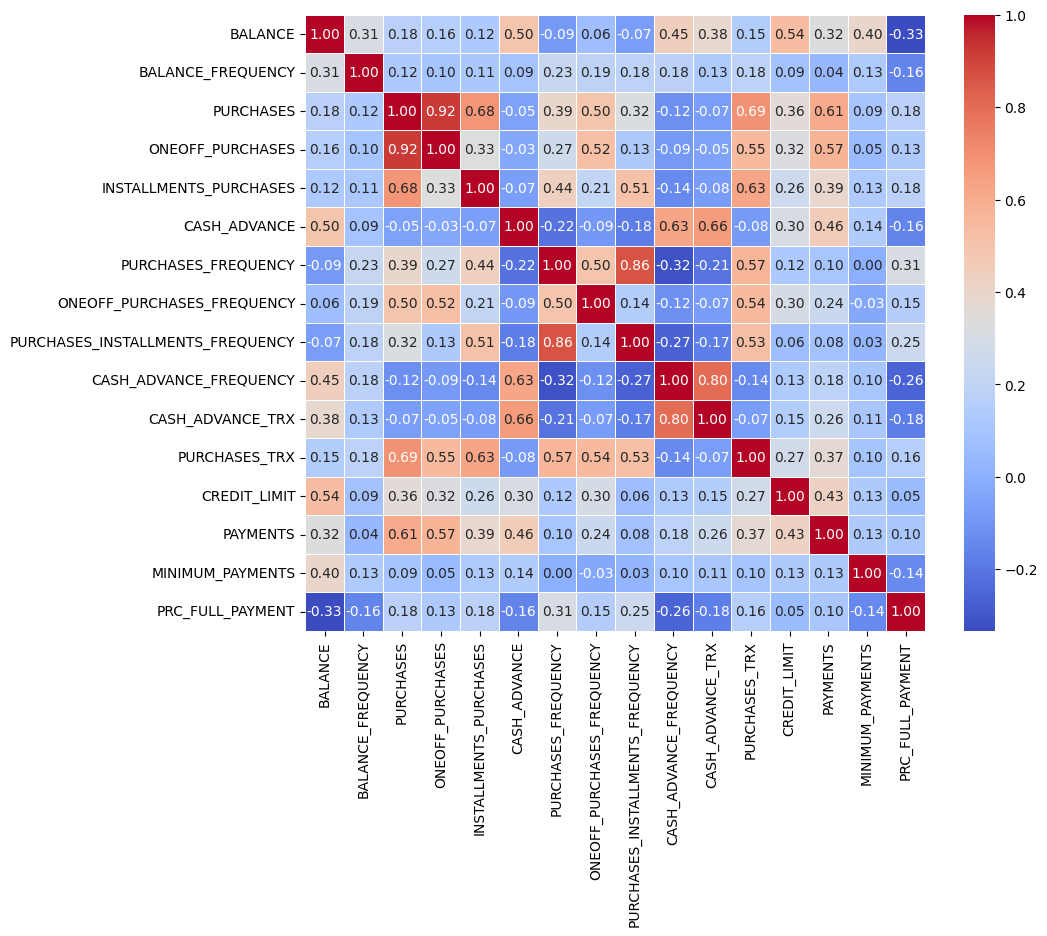

In [ ]:
corr_matrix = data_of_interest.corr()

# Ploting  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

### some columns are correlated to each other 
- PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY
- PURCHASES, ONEOFF_PURCHASES
- CASH_ADVANCE_TRX, CASH_ADVANCE_FREQUENCY

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
 #### From  the above
1- We have only 2 columns containting  nan values (`CREDIT_LIMIT`, `MINIMUM_PAYMENTS`), so those rows will be dropped       <br>
2- Most columns are skewness and have the same distribution right skewed except 2 columns (BALANCE_FREQUENCY, PURCHASES_FREQUENCY), so log transformation may be applied to this colulmns         <br>
3- I will drop `CUST_ID` <br>
4- some of the columns that are correlated to each other will be dropped.<br>  
     `PURCHASES_INSTALLMENTS_FREQUENCY` , `ONEOFF_PURCHASES`  , `CASH_ADVANCE_FREQUENCY`     <br>       

In [ ]:
#copy for the original dataset
df_copy=df.copy()

### Drop nans

In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
round(df_copy.isnull().sum(axis=0)*100/df_copy.shape[0],2)

#### Dropping columns to be dropped.


In [ ]:
df_copy.drop(columns=['CUST_ID', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                      'ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY' ], inplace=True)

### Apply Log Transformation 

In [ ]:
df_copy.skew()

In [ ]:
df_copy_log= np.log(df_copy+ 0.1)

In [ ]:
df_copy_log.skew()

### skewness of features has been improved relatively

### Applying T-SNE and Elbow Method  to  choose the correct clusters

In [ ]:
# Apply t-SNE to reduce dimensions to 2 for visualization

plt.figure(figsize=(10, 8))
tsne_1 = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2500)
X_tsne_1 = tsne_1.fit_transform(df_copy_log)

# Add the cluster information to the reduced data
df_tsne_1 = pd.DataFrame(data=X_tsne_1, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne_1)
plt.title('Clusters Visualized with t-SNE')
plt.show()

#### Applying standard scaller

In [ ]:
object= StandardScaler()
df_copy_standard = object.fit_transform(df_copy) 

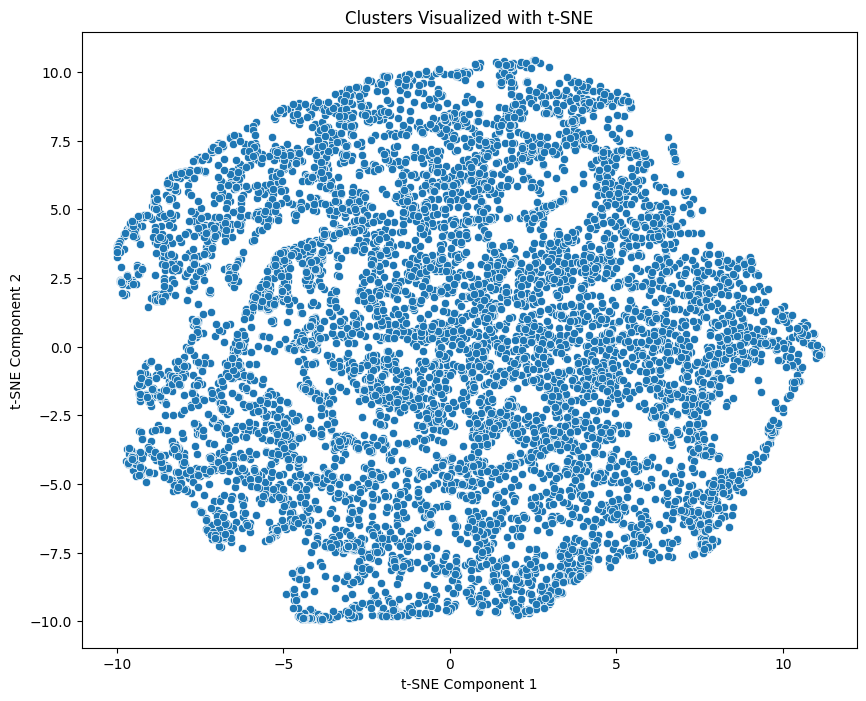

In [21]:
# Apply t-SNE to reduce dimensions to 2 for visualization

plt.figure(figsize=(10, 8))
tsne_2 = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2500)
X_tsne_2 = tsne_2.fit_transform(df_copy_standard)

# Add the cluster information to the reduced data
df_tsne_2 = pd.DataFrame(data=X_tsne_2, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne_2)
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [22]:
object_2= RobustScaler()
df_copy_robust = object_2.fit_transform(df_copy) 

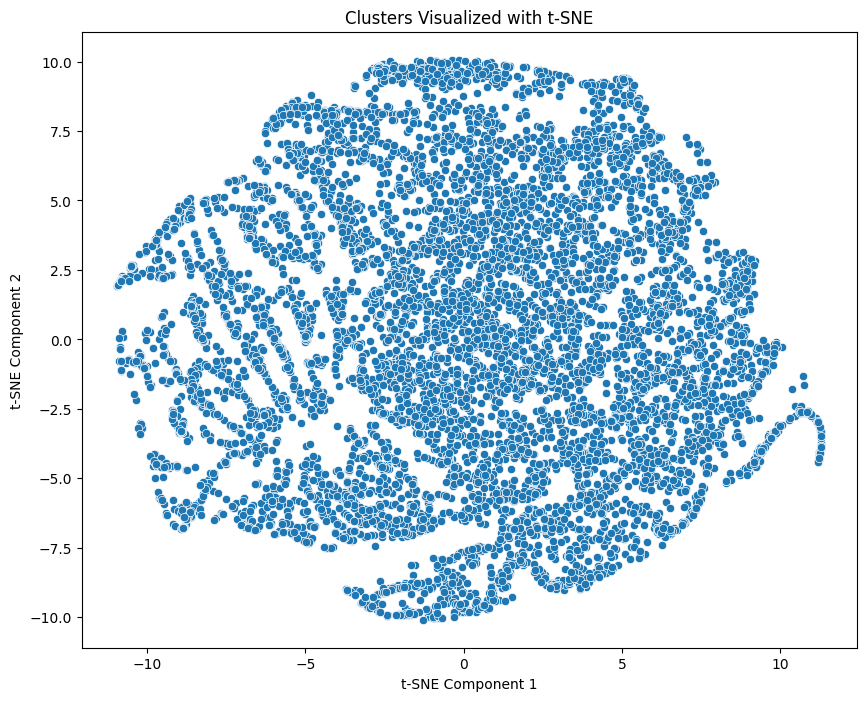

In [23]:
# Apply t-SNE to reduce dimensions to 2 for visualization

plt.figure(figsize=(10, 8))
tsne_3 = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2500)
X_tsne_3 = tsne_3.fit_transform(df_copy_robust)

# Add the cluster information to the reduced data
df_tsne_3 = pd.DataFrame(data=X_tsne_3, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', data=df_tsne_3)
plt.title('Clusters Visualized with t-SNE')
plt.show()

### - From all the above the best preproccing to be used is the log 

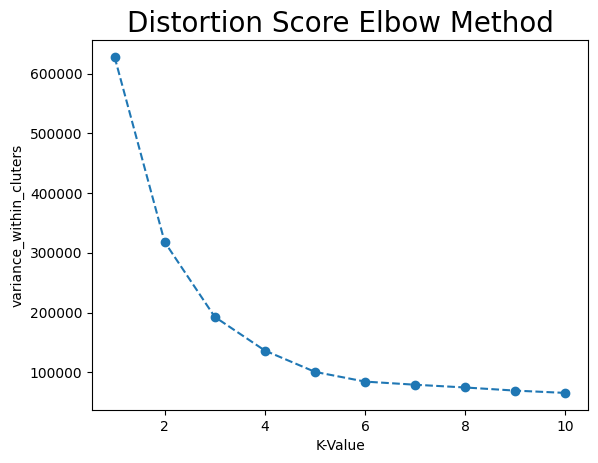

In [24]:
# Elbow method
variance_cluters= []

for i in range(1,11): 
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(df_copy_log)
    variance_cluters.append(km.inertia_)
    
plt.plot(range(1,11),variance_cluters, marker='o', linestyle='--')
plt.title('Distortion Score Elbow Method', fontsize =20)
plt.xlabel('K-Value')
plt.ylabel('variance_within_cluters')
plt.show()

### - From all of the above, the optimal Clusters are 5.

## K-means

In [25]:
# Number of clusters 
n_clusters = 5

# Instantiate the KMeans model
kmeans_model = KMeans(n_clusters=n_clusters )

# Fitting the model
kmeans_model.fit(df_copy_log)

KMeans(n_clusters=5)

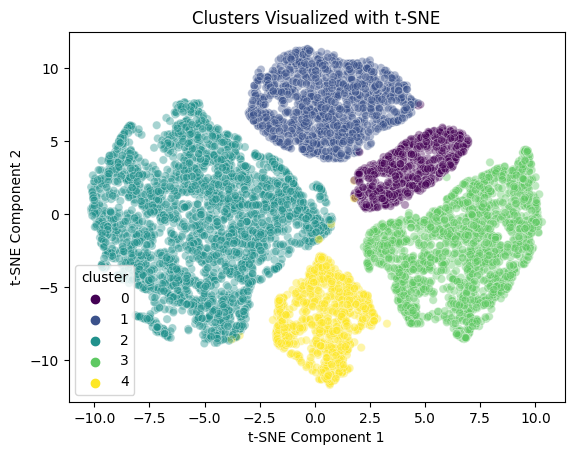

In [26]:
# Add the cluster information to the reduced data
df_tsne_1['cluster'] = kmeans_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_1, palette='viridis', alpha=0.4 )
plt.title('Clusters Visualized with t-SNE')
plt.show()

In [56]:
class KMeansClustering:
    def init(self, K):
        self.K = K
        self.centroids = None
        self.labels = None

    def fit(self, X, max_iters=100):
        self.centroids = self.kMeansInitCentroids(X)
        for _ in range(max_iters):
            self.labels = self.findClosestCentroids(X)
            self.centroids = self.computeCentroids(X)

    def kMeansInitCentroids(self, X):
        centroids = np.zeros((self.K, X.shape[1]))
        centroids = X[np.random.choice(X.shape[0], size=(self.K), replace=False), :]
        return centroids 

    def findClosestCentroids(self, X):
        idx = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            dist = np.linalg.norm(X[i, :] - self.centroids, axis=1)
            idx[i] = np.argmin(dist)
        return idx

    def computeCentroids(self, X):
        Centroids = np.zeros((self.K, X.shape[1]))
        for i in range(self.K):
            Centroids[i, :] = np.mean(X[self.labels == i], axis=0)
        return Centroids

    def predict(self, x):
        dist = np.linalg.norm(x - self.centroids, axis=1)
        label = np.argmin(dist)
        return label

In [57]:
kmeans_model_implemented = KMeansClustering(K=5)
kmeans_model_implemented.fit(df_copy_log)


TypeError: KMeansClustering() takes no arguments

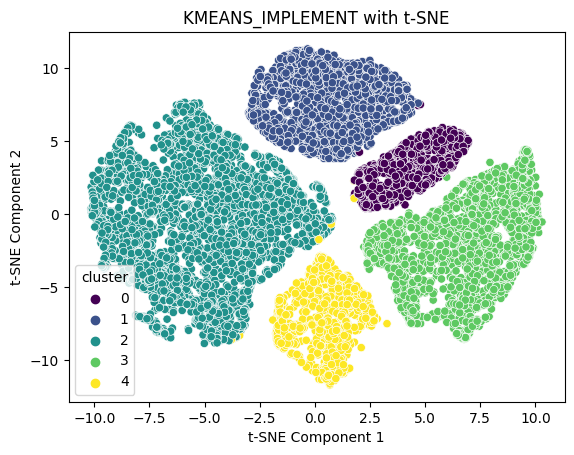

In [58]:
df_tsne_1['cluster'] = kmeans_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data= df_tsne_1, palette='viridis' )
plt.title('KMEANS_IMPLEMENT with t-SNE')
plt.show()

## Hierarchial Clustering

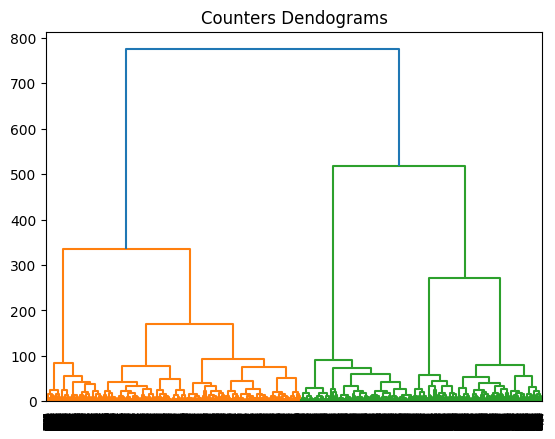

In [59]:
plt.title("Counters Dendograms")
dendro = shc.dendrogram(shc.linkage(y=df_copy_log ,
                                  method='ward',
                                  metric='euclidean'),
                        orientation='top')

In [60]:
# Number of clusters 
n_clusters = 5

# Initialize the AgglomerativeClustering model
hierarical_model = AgglomerativeClustering(n_clusters=n_clusters)
hierarical_model.fit(df_copy_log)

AgglomerativeClustering(n_clusters=5)

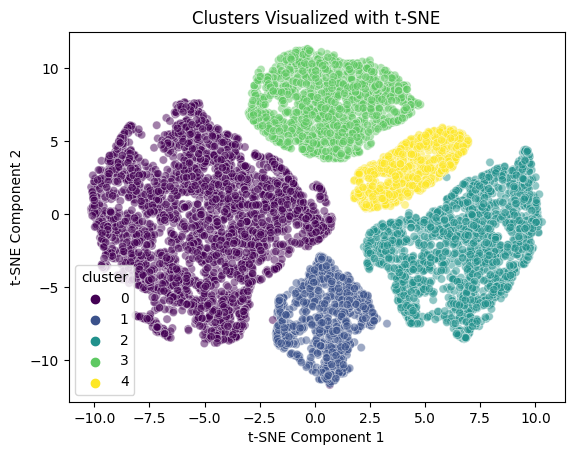

In [61]:
# Add the cluster information to the reduced data
df_tsne_1['cluster'] = hierarical_model.labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_1, palette='viridis', alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()


## GaussianMixture

In [62]:
# Number of clusters 
n_clusters = 5

# Initialize the GaussianMixture model
gauss_model = GaussianMixture(n_components=n_clusters,covariance_type='full')
labels_ = gauss_model.fit_predict(df_copy_log)


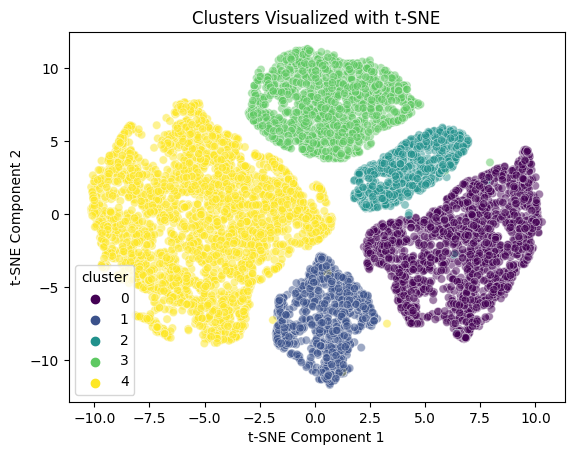

In [63]:
# Add the cluster information to the reduced data
df_tsne_1['cluster'] = labels_

# Plotting
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_1, palette='viridis',alpha=0.5)
plt.title('Clusters Visualized with t-SNE')
plt.show()

## DBSCAN

In [64]:
# Initialize the DBSCAN model
dbscan_model = DBSCAN(eps=4, min_samples=500).fit(df_copy_log)

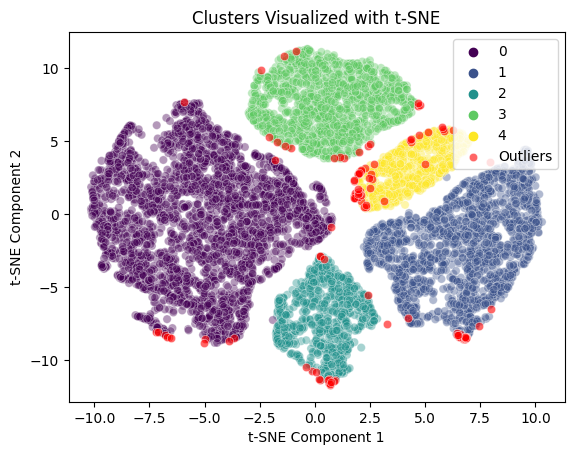

In [65]:
# Add the cluster information to the reduced data
df_tsne_1['cluster'] = dbscan_model.labels_

outliers = df_tsne_1['cluster'] == -1
df_tsne_without_outliers = df_tsne_1[~outliers]

# Plot clusters with different colors
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='cluster', data=df_tsne_without_outliers, palette='viridis', alpha=0.4)

# Color outliers (cluster = -1) with a specific color
outliers= df_tsne_1['cluster'] == -1
sns.scatterplot(x=df_tsne_1.loc[outliers, 't-SNE Component 1'], 
                y=df_tsne_1.loc[outliers, 't-SNE Component 2'], 
                color='red', 
                label='Outliers', 
                alpha=0.6)

plt.title('Clusters Visualized with t-SNE')
plt.legend()
plt.show()

## - So the best model is  Hierarchial Clustering and it will be used for business analysis

In [66]:
df_copy_log['Cluster'] = hierarical_model.labels_

cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']

df_copy_log.groupby('Cluster').mean()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,
0,5.296775,-0.058217,6.533789,5.994216,-2.302585,-0.218215,-1.529581,-2.302585,2.676668,8.078610,6.675548,5.498426,-1.396950,2.458160
1,5.386092,-0.188625,5.986007,-2.302585,-2.302585,-0.984226,-0.986716,-2.302585,1.419090,8.066035,6.470335,5.430757,-1.850069,2.453475
2,7.083764,-0.027415,-2.298307,-2.296596,6.862001,-2.300720,-2.300720,1.402304,-2.291313,7.993522,6.764012,6.216379,-2.094938,2.427724
3,7.413430,0.057192,6.676514,5.943146,6.906947,-0.249351,-1.316796,1.478320,2.757505,8.286914,7.338399,6.597616,-2.028975,2.444633
4,7.234285,0.017754,5.668445,-2.302585,6.850252,-1.146719,-1.147205,1.487227,1.238507,8.148129,6.993270,6.345496,-2.055168,2.425808



#  <a name="5">Business meaning of clusters</a>

## `Cluster 0`
Customers in Cluster 0 tend to prefer making purchases in installments rather than opting for cash advances. They exhibit a consistent spending pattern with a significant portion of their spending occurring through installment payments. On average, these customers make around 23 purchase transactions, with the majority showing frequent purchase behavior. While purchases are frequent, they are moderate in size, with an average total purchase amount of $1528.

## `Cluster 1`
Customers in Cluster 1 exhibit a preference for one-off purchases over installment payments. They tend to avoid purchases in installments and demonstrate a tendency towards lump-sum spending. With a mean of approximately 8 purchase transactions, their purchasing activity is moderate, with around 36% showing frequent purchase behavior. The average total purchase amount is $903, indicating a preference for one-off purchases with a moderate spending amount.

## `Cluster 2` 
Cluster 2 customers predominantly rely on cash advances over installment purchases. They demonstrate infrequent or one-time spending habits, with none exhibiting frequent purchase behavior. The average cash advance amount of $2011 suggests a substantial need for immediate funds, possibly indicating unexpected expenses or significant cash flow requirements among this group.

## `Cluster 3`
Cluster 3 customers prefer both installment purchases and cash advances. They engage in active spending behavior, with a high number of purchase transactions and frequent purchase activity. The average total purchase amount is moderate, indicating consistent but controlled spending habits. Additionally, customers in this cluster rely on cash advances, reflecting a need for immediate funds to support their purchasing behavior.

## `Cluster 4`
Cluster 4 customers prefer cash advances over installment purchases, indicating a reliance on immediate funds. Their spending on purchases is moderate, with fewer transactions compared to other clusters. Around 27% exhibit frequent purchase behavior, suggesting a tendency towards infrequent spending. The average cash advance amount is significant, indicating heavy reliance on such transactions, possibly indicating financial instability or unexpected expenses among this group.